# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

- Most of the drugs are as effective as the placebo

- Ramicane and Capomulin are the only drugs that are really worthit based on the data

- There is a correlation between weight and tumor volume
 

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
total_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [128]:
# Checking the number of mice.
len(total_data["Mouse ID"].unique())
total_data["Mouse ID"]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [129]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
total_data[total_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [130]:
# Optional: Get all the data for the duplicate mouse ID. 
total_data[total_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [131]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
total_data = total_data.loc[total_data["Mouse ID"]!="g989"]
mouse_metadata = mouse_metadata.loc[mouse_metadata["Mouse ID"]!="g989"]
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [132]:
# Checking the number of mice in the clean DataFrame.
len(total_data["Mouse ID"].unique())


248

## Summary Statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_data = pd.DataFrame({})
drug_data["Mean Tumor Volume"]=total_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':'mean'}) 
drug_data["Median Tumor Volume"]=total_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':'median'})
drug_data["Tumor Volume Variance"]=total_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':'var'}) 
drug_data["Tumor Volume Std. Dev."]=total_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':'std'}) 
drug_data["Tumor Volume Std. Err."]=total_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':'sem'}) 

drug_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [134]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
total_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:ylabel='# of Observed Mouse Timepoints'>

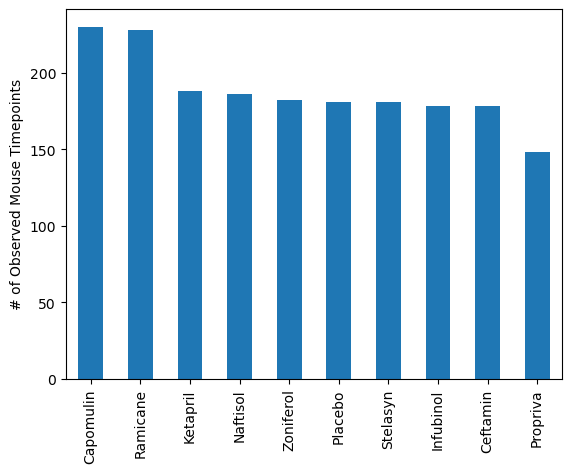

In [135]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts=total_data["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar", ylabel= "# of Observed Mouse Timepoints")

In [136]:
drug_counts.reset_index()["index"]


0    Capomulin
1     Ramicane
2     Ketapril
3     Naftisol
4    Zoniferol
5      Placebo
6     Stelasyn
7    Infubinol
8     Ceftamin
9     Propriva
Name: index, dtype: object

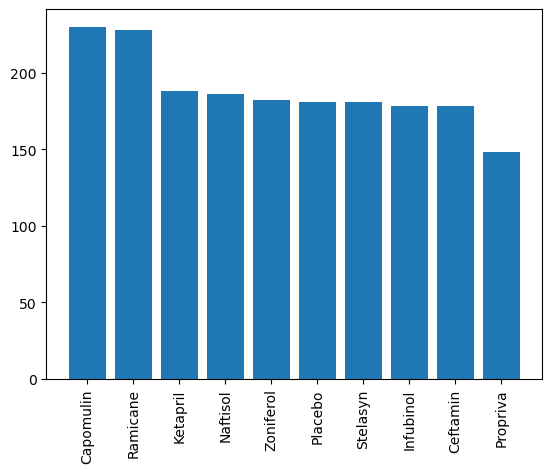

In [137]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
ax= plt.subplot()
ax.bar(drug_counts.reset_index()["index"], drug_counts.reset_index()["Drug Regimen"])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Sex'>

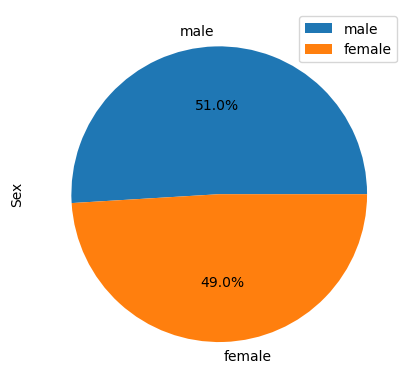

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female = total_data.loc[total_data["Sex"]=="Female"].count()
male=total_data.loc[total_data["Sex"]=="Male"].count()
pie_chart_data = pd.DataFrame({"male":male,"female":female})

pie_chart_data=pie_chart_data.transpose()
pie_chart_data.plot(kind= 'pie', y = 'Sex', autopct="%.1f%%")

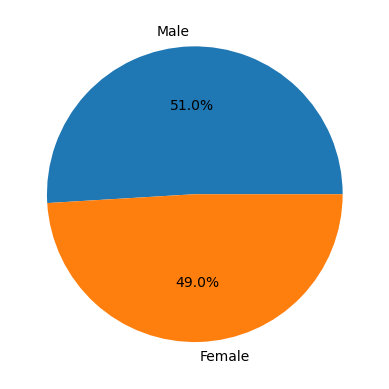

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female = total_data.loc[total_data["Sex"]=="Female"].count()
male=total_data.loc[total_data["Sex"]=="Male"].count()
plt.pie([male[0],female[0]], labels = mouse_metadata["Sex"].unique(), autopct='%.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#
new_data =total_data.groupby("Mouse ID").agg({"Timepoint":"max"})
new_data
mouse_metadata = pd.merge(mouse_metadata, new_data, on="Mouse ID")
final_tumor=[]
for mouse in mouse_metadata["Mouse ID"]:
    timepoint =(mouse_metadata.loc[mouse_metadata["Mouse ID"]==mouse]["Timepoint"])
    final_tumor.append(float(total_data.loc[(total_data["Mouse ID"]==mouse) & (total_data["Timepoint"]==int(timepoint))]["Tumor Volume (mm3)"]))
mouse_metadata["Final Tumor Volume"] = final_tumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [141]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

for drug in treatments:
    tumor_vol_data.append(mouse_metadata.loc[mouse_metadata["Drug Regimen"]==drug]["Final Tumor Volume"].sort_values(ascending=True).values)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    

#Using recursion to calculate outliers to save the computation of looping

def Outliers(data):
    returner=[]
    lower = np.quantile(data,[0.0,0.25,0.5,0.75,1])[1]-1.5*st.iqr(data)
    upper = np.quantile(data,[0.0,0.25,0.5,0.75,1])[3]+1.5*st.iqr(data)
    if data[0]<=lower:
        returner.append(data[0])
        Outliers(np.delete(data,0))
    if data[len(data)-1]>=upper:
        returner.append(data[len(data)-1])
        Outliers(data,np.delete(len(data)-1))
    return returner
    
for i in range(len(tumor_vol_data)):
    print("The IQR for the data on "+treatments[i]+" is "+str(st.iqr(tumor_vol_data[i])))
    print("Here is a list of the outliers of the drug "+treatments[i]+" "+str(Outliers(tumor_vol_data[i]))+"\n")
    

The IQR for the data on Capomulin is 7.781863460000004
Here is a list of the outliers of the drug Capomulin []

The IQR for the data on Ramicane is 9.098536719999998
Here is a list of the outliers of the drug Ramicane []

The IQR for the data on Infubinol is 11.477135160000003
Here is a list of the outliers of the drug Infubinol [36.3213458]

The IQR for the data on Ceftamin is 15.577752179999997
Here is a list of the outliers of the drug Ceftamin []



<AxesSubplot:ylabel='Tumor Volume'>

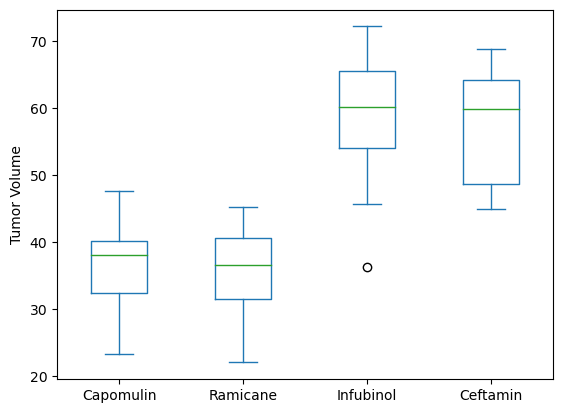

In [142]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
four_drugs = pd.DataFrame({treatments[0]:tumor_vol_data[0],treatments[1]:tumor_vol_data[1], treatments[2]:tumor_vol_data[2],treatments[3]:tumor_vol_data[3]})
four_drugs.plot(kind="box", xlabel = "Drug Regimen", ylabel="Tumor Volume")

## Line and Scatter Plots

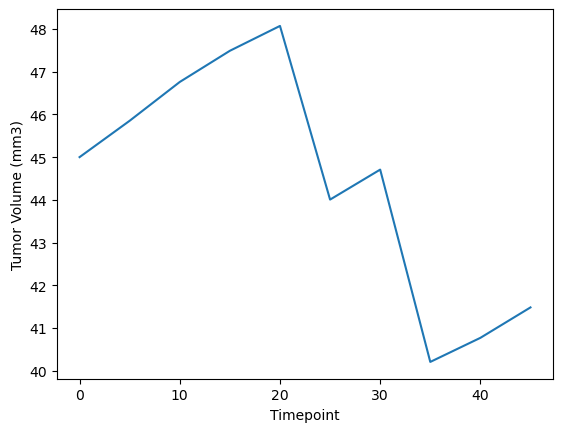

In [143]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
TV_vs_TP =total_data.loc[(total_data["Drug Regimen"]=="Capomulin") & (total_data["Mouse ID"]=="l509")]
plt.plot(TV_vs_TP["Timepoint"].values, TV_vs_TP["Tumor Volume (mm3)"].values)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

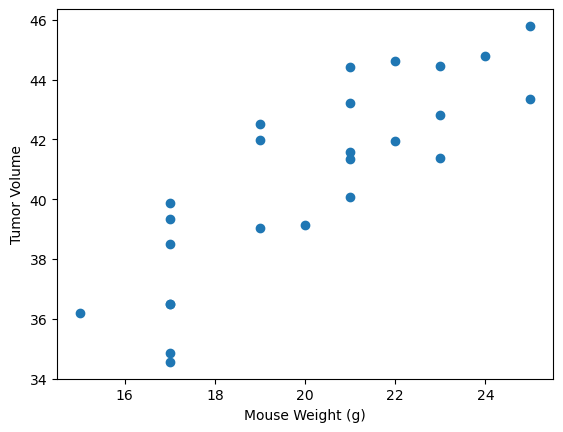

In [152]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = total_data.loc[total_data["Drug Regimen"]=="Capomulin"]
x=capomulin_data.groupby("Mouse ID").aggregate({"Weight (g)":"mean"})
y =capomulin_data.groupby("Mouse ID").aggregate({"Tumor Volume (mm3)":"mean"})
plt.scatter(x, y)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume')
plt.show()

## Correlation and Regression

The r-value is: 0.8419363424694721


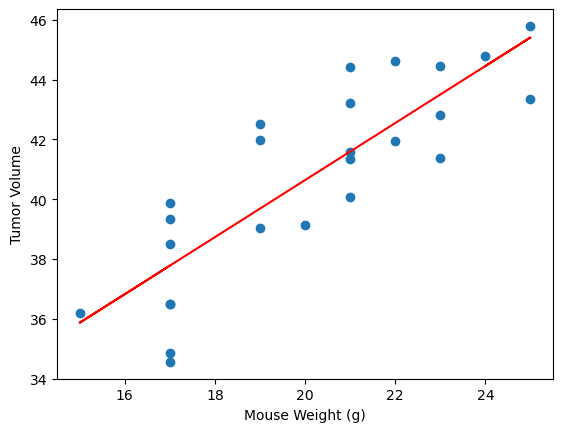

In [154]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x["Weight (g)"], y["Tumor Volume (mm3)"])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume')
print(f"The r-value is: {rvalue}")
plt.show()